# Data Preparation

We take Zeisel dataset as example. Zeisel dataset can be download from https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/cortex/expression_mRNA_17-Aug-2014.txt.
First we preprocess Zeisel dataset by filtering genes based on the number of cells and selecting high variable genes.

We also provide demo data as shown in ../demo_data/embedding/input and expected output as shown in ../demo_data/embedding/output 

In [1]:
import pandas as pd
import scanpy as sc
zeisel = pd.read_csv('../data/data.txt',sep='\t',index_col=0)
data = zeisel.iloc[10:,1:].astype(float)
adata = sc.AnnData(data)
adata = adata.transpose()
sc.pp.filter_genes(adata,min_cells=30)
adata.var['std'] = adata.X.std(0)
adata.obs['label'] = list(zeisel.iloc[7])[1:]
Zeisel_dataset = adata[:,adata.var.sort_values('std',ascending=False).iloc[:1000].index]
sc.pp.log1p(Zeisel_dataset)
pd.DataFrame(Zeisel_dataset.X,index=list(Zeisel_dataset.obs_names),columns=list(Zeisel_dataset.var_names)).to_csv('../demo_data/embedding/input/Zeisel.csv')

/home/jel-khoury/.conda/envs/deepsem/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,2

In [2]:
import pandas as pd
import scanpy as sc
pd.DataFrame(Zeisel_dataset.X,index=list(Zeisel_dataset.obs_names),columns=list(Zeisel_dataset.var_names)).to_csv('../demo_data/embedding/input/Zeisel.csv')

# Run DeepSEM by using command 
"python main.py --data_file ../demo_data/embedding/input/Zeisel.csv --task embedding "

In [3]:
! python ../main.py --data_file ../demo_data/embedding/input/Zeisel.csv --task embedding --save_name '../demo_data/embedding/output'

dir exist
epoch: 0 loss 0.9829482981499206 mse_loss: 0.9083133694973398 kl_loss: 0.06363552935703835 sparse_loss: 0.010999386198818684
epoch: 1 loss 0.8715703119622901 mse_loss: 0.7737784385681152 kl_loss: 0.08325182646512985 sparse_loss: 0.014540040350340783
epoch: 2 loss 0.8432976578144317 mse_loss: 0.7688041659111672 kl_loss: 0.05899118021764654 sparse_loss: 0.015502315192939119
epoch: 3 loss 0.7557393692909403 mse_loss: 0.57860695871901 kl_loss: 0.16141645317064954 sparse_loss: 0.015715936198830605
epoch: 4 loss 0.7120470429988618 mse_loss: 0.5459740948169789 kl_loss: 0.15029385559102323 sparse_loss: 0.015779093502366795
epoch: 5 loss 0.6960131931812206 mse_loss: 0.5450641436779753 kl_loss: 0.13456439892662334 sparse_loss: 0.01638464835730005
epoch: 6 loss 0.6715769399987891 mse_loss: 0.4818165289594772 kl_loss: 0.17312463547321075 sparse_loss: 0.016635797917842865
epoch: 7 loss 0.6550307286546585 mse_loss: 0.4595838937353581 kl_loss: 0.17875555760048806 sparse_loss: 0.016691281836

## UMAP Plot

In [6]:
output_1 = sc.read_h5ad('../demo_data/embedding/output/embedding.h5ad')
#output = sc.read_h5ad('../demo_data/embedding/output/deepSEM.h5ad') #already provided in github repo

In [8]:
output_1.obs['label'] = list(zeisel.iloc[7])[1:]
sc.pp.neighbors(output_1,n_neighbors=30)
maxn = 2
minn= 0
x = 1
sc.tl.louvain(output_1,resolution=x,random_state=0)
N =len(set(output_1.obs['label']))
while len(set(output_1.obs['louvain'])) !=N:
    if   len(set(output_1.obs['louvain'])) < N:
            minn = x
            x = (maxn+x) /2
    if   len(set(output_1.obs['louvain'])) > N:
            maxn= x
            x = (minn+x) /2
    print(x,maxn,minn)
    sc.tl.louvain(output_1,resolution=x,random_state=0)

0.5 1 0


In [10]:
#sc.tl.umap(output)
#sc.pl.umap(output,color=['label','louvain'])
sc.tl.umap(output_1)
sc.pl.umap(output_1,color=['label','louvain'])

TypeError: simplicial_set_embedding() missing 3 required positional arguments: 'densmap', 'densmap_kwds', and 'output_dens'

In [ ]:
output = sc.read_h5ad('out/embedding.h5ad')
output.obs['label'] = list(zeisel.iloc[7])[1:]
sc.pp.neighbors(output,n_neighbors=30)
maxn = 2
minn= 0
x = 1
sc.tl.louvain(output,resolution=x,random_state=0)
N =len(set(output.obs['label']))
while len(set(output.obs['louvain'])) !=N:
    if   len(set(output.obs['louvain'])) < N:
            minn = x
            x = (maxn+x) /2
    if   len(set(output.obs['louvain'])) > N:
            maxn= x
            x = (minn+x) /2
    print(x,maxn,minn)
    sc.tl.louvain(output,resolution=x,random_state=0)

         Falling back to preprocessing with `sc.pp.pca` and default params.
0.5 1 0


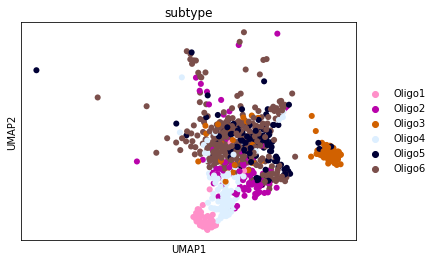

In [ ]:
sc.pl.umap(output[output.obs['label']=='oligodendrocytes'],color='subtype')

## Cluster performance

In [ ]:
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score
print(adjusted_rand_score(output.obs['label'],output.obs['louvain']),adjusted_mutual_info_score(output.obs['label'],output.obs['louvain']))

0.8566261406591081 0.8292449547550597
